# Linear Regression
Cenying (Tracy) Yang (cenying.yang@cityu.edu.hk)

Department of Information Systems

City University of Hong Kong

## 1. Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import airbnb data
airbnb = pd.read_csv('airbnb.csv')

In [3]:
# print out the first 5 rows of the data
print(airbnb.head())

   NameLen               Style  Price  Cancellation  Stars  Reviews  \
0       43  entire condominium    154             0    4.5        2   
1       44        entire house    110             0    5.0       28   
2       50         entire loft     74             1    4.5        2   
3       33   entire guesthouse    135             0    5.0       12   
4       15  entire condominium     90             1    4.5       18   

   Superhost  Guests  Bedrooms  Beds  Baths  DescLen  Amenities  Latitude  \
0          0       4         2     3    2.0      340         12  35.68795   
1          1       4         2     2    1.0      492         42  35.68669   
2          0       2         1     1    1.0      460         15  35.67155   
3          1       2         1     1    1.0      404         35  35.69268   
4          0       2         1     1    1.0      368          7  35.68672   

   Longitude  PlazaDist  CanyonRdDist  CapitolDist  OperaDist  AirportDist  
0 -105.93688   0.119008      0.77

count     99.000000
mean     170.050505
std      110.452444
min       35.000000
25%      101.500000
50%      131.000000
75%      199.000000
max      744.000000
Name: Price, dtype: float64


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

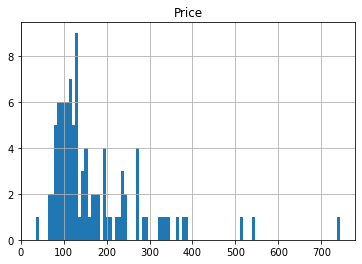

In [4]:
# check the summary statistics and the distribution of the variable Price
print(airbnb['Price'].describe())
airbnb.hist('Price', bins = 100)

array([[<AxesSubplot:title={'center':'log_Price'}>]], dtype=object)

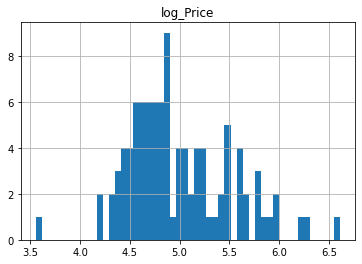

In [5]:
# since the distribution is right skewed, we need to take log transformation of the variable
airbnb['log_Price'] = np.log(airbnb['Price'])
airbnb.hist('log_Price', bins = 50)

In [6]:
# average log price for superhost vs non superhost
group_by_superhost = airbnb.groupby('Superhost')['log_Price'].mean()
print(group_by_superhost)

Superhost
0    5.115792
1    4.892377
Name: log_Price, dtype: float64


In [7]:
# average log price for different # of bedrooms
group_by_bedroom = airbnb.groupby('Bedrooms')['log_Price'].mean()
print(group_by_bedroom)

Bedrooms
0    4.670109
1    4.794342
2    5.346705
3    5.712909
4    6.612041
Name: log_Price, dtype: float64


<AxesSubplot:xlabel='PlazaDist', ylabel='log_Price'>

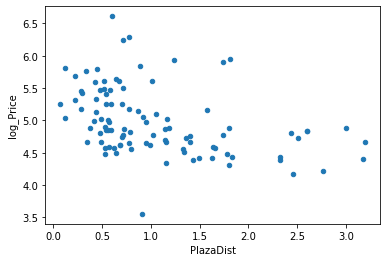

In [8]:
# Check correlation between log price and distance to plaza
# a scatter plot of log price and distance to plaza
airbnb.plot.scatter(x = 'PlazaDist', y = 'log_Price')

<AxesSubplot:xlabel='Stars', ylabel='log_Price'>

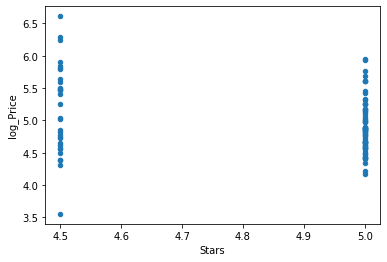

In [9]:
# Check correlation between log price and review stars
# a scatter plot of log price and stars
airbnb.plot.scatter(x = 'Stars', y = 'log_Price')

## 2. Linear regression

#### scikit-learn (also known as sklearn) is a library featuring various classification, regression and clustering algorithms including linear regression, decision tree, k-means, etc.

In [10]:
from sklearn import metrics, linear_model, model_selection

In [11]:
# check column names
airbnb.columns.values

array(['NameLen', 'Style', 'Price', 'Cancellation', 'Stars', 'Reviews',
       'Superhost', 'Guests', 'Bedrooms', 'Beds', 'Baths', 'DescLen',
       'Amenities', 'Latitude', 'Longitude', 'PlazaDist', 'CanyonRdDist',
       'CapitolDist', 'OperaDist', 'AirportDist', 'log_Price'],
      dtype=object)

In [12]:
# prepare X and y
X = airbnb[['NameLen','Cancellation', 'Stars', 'Reviews','Superhost', 'Guests', 'Bedrooms', 'Beds', 'Baths', 'DescLen',
           'Amenities', 'PlazaDist', 'CanyonRdDist','CapitolDist', 'OperaDist', 'AirportDist']].values
y = airbnb['log_Price'].values
print(X.shape)
print(y.shape)

(99, 16)
(99,)


In [14]:
# split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.2, random_state=42)
print('Training size: ', y_train.shape)
print('Testing size: ', y_test.shape)

Training size:  (79,)
Testing size:  (20,)


In [15]:
# run linear regression
linreg = linear_model.LinearRegression()
linreg_fit = linreg.fit(X_train, y_train)

In [16]:
# check coefficients
print(linreg_fit.coef_)

[ 2.49472159e-03 -1.98443082e-01  3.87446406e-01 -5.75954640e-04
  1.71985578e-02  1.32126038e-01  9.30266062e-02 -1.29911323e-01
  3.73943060e-01  5.80758834e-05 -6.39213528e-04 -9.38386794e-02
 -7.10385671e-02  1.05143287e-02  9.48292245e-02  4.47717987e-02]


In [17]:
# use mean square error (mse) to evaluate the model
train_predict = linreg_fit.predict(X_train)
test_predict = linreg_fit.predict(X_test)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)
print('Training error: ', mse_train)
print('Testing error: ', mse_test)

Training error:  0.061598691162213205
Testing error:  0.0654409653093404


## 3. Regularized linear regression

In [18]:
# use default alpha value to run ridge
ridge = linear_model.Ridge()
ridge_fit = ridge.fit(X_train, y_train)

In [19]:
print(ridge_fit.coef_)

[ 2.36283307e-03 -1.80502266e-01  2.50033496e-01 -7.53415251e-04
  2.64320660e-02  1.24595458e-01  1.09836831e-01 -1.04604974e-01
  3.09597478e-01  6.04683022e-05 -1.72234081e-04 -7.50488817e-02
 -7.79290279e-02 -8.39210687e-03  8.78607637e-02  4.35317719e-02]


In [20]:
train_predict = ridge_fit.predict(X_train)
test_predict = ridge_fit.predict(X_test)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)
print('Training error: ', mse_train)
print('Testing error: ', mse_test)

Training error:  0.062363165042565026
Testing error:  0.053946106337202246


In [21]:
# use default alpha value to run lasso
lasso = linear_model.Lasso()
lasso_fit = lasso.fit(X_train, y_train)

In [22]:
print(lasso_fit.coef_)

[ 0.         -0.         -0.         -0.00245586 -0.          0.
  0.          0.          0.          0.00019513  0.         -0.
 -0.         -0.         -0.          0.        ]


In [23]:
train_predict = lasso_fit.predict(X_train)
test_predict = lasso_fit.predict(X_test)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)
print('Training error: ', mse_train)
print('Testing error: ', mse_test)

Training error:  0.2029599531228819
Testing error:  0.34396782500778517


In [24]:
# use cross validation to select optimal hyperparameter alpha for Ridge
ridge_cv = linear_model.RidgeCV(alphas=[0.1, 0.5, 1.0, 5, 10.0], cv = 5)
ridge_cv_fit = ridge_cv.fit(X_train, y_train)

In [25]:
# print out the best alpha
print(ridge_cv_fit.alpha_)

5.0


In [26]:
# run Ridge using the optimal lambda (alpha)
ridge = linear_model.Ridge(alpha = 5)
ridge_fit = ridge.fit(X_train, y_train)
print(ridge_fit.coef_)

[ 2.30013332e-03 -1.40690495e-01  9.20398277e-02 -1.04097475e-03
  2.51579253e-02  1.12712565e-01  1.17787758e-01 -5.23840914e-02
  2.09180333e-01  6.77849698e-05  1.51750086e-04 -6.03472162e-02
 -8.54312111e-02 -2.57770124e-02  7.40040791e-02  3.87117297e-02]


In [27]:
train_predict = ridge_fit.predict(X_train)
test_predict = ridge_fit.predict(X_test)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)
print('Training error: ', mse_train)
print('Testing error: ', mse_test)

Training error:  0.06631664714550631
Testing error:  0.04471550013962637


In [28]:
# use cross validation to select optimal hyperparameter lambda (alpha in python) for Lasso
lasso_cv = linear_model.LassoCV(alphas=[0.1, 0.5, 1.0, 5, 10.0], cv = 5)
lasso_cv_fit = lasso_cv.fit(X_train, y_train)

In [29]:
# print out the best alpha
print(lasso_cv_fit.alpha_)

0.1


In [30]:
# run Lasso using the optimal lambda (alpha)
lasso = linear_model.Lasso(alpha = 0.1)
lasso_fit = lasso.fit(X_train, y_train)
print(lasso_fit.coef_)

[ 3.88412659e-03 -0.00000000e+00 -0.00000000e+00 -2.10446397e-03
 -0.00000000e+00  1.36920120e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.23450507e-04 -4.26660579e-04 -0.00000000e+00
 -4.32076003e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [31]:
train_predict = lasso_fit.predict(X_train)
test_predict = lasso_fit.predict(X_test)
mse_train = metrics.mean_squared_error(y_true=y_train, y_pred=train_predict)
mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=test_predict)
print('Training error: ', mse_train)
print('Testing error: ', mse_test)

Training error:  0.11400553738094515
Testing error:  0.11538058330936944


### Based on the results, we should go with Ridge with alpha = 5. Any insights?